# tchinese

In [2]:
import pandas as pd
import numpy as np
from numpy.random import randint
from datetime import datetime
import gc
import os
import re
from collections import Counter
import warnings
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
matplotlib.use("TkAgg")
%matplotlib inline

In [3]:
target_lang_list = ["koreana", "japanese", "tchinese", "schinese", "thai", "turkish",
                    "english", "french", "german", "italian", "czech", "norwegian", "swedish", "polish",
                    "portuguese", "spanish", "russian"]

# 각 언어별 처리에 필요한 값들을 데이터프레임 형식으로 작성
lang_data_dict = {
    # 언어 코드
    "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    },
    # 언어 별 폰트
    "font_path" : {
        "schinese": "./font/NotoSansSC-Bold.otf",
        "english": "./font/NotoSans-Bold.ttf",
        "turkish": "./font/NotoSans-Bold.ttf",
        "spanish": "./font/NotoSans-Bold.ttf",
        "russian": "./font/NotoSans-Bold.ttf",
        "koreana": "./font/NotoSansKR-Bold.otf",
        "latam": "./font/NotoSans-Bold.ttf",
        "brazilian": "./font/NotoSans-Bold.ttf",
        "portuguese": "./font/NotoSans-Bold.ttf",
        "vietnamese": "./font/NotoSans-Bold.ttf",
        "polish": "./font/NotoSans-Bold.ttf",
        "french": "./font/NotoSans-Bold.ttf",
        "german": "./font/NotoSans-Bold.ttf",
        "hungarian": "./font/NotoSans-Bold.ttf",
        "ukrainian": "./font/NotoSans-Bold.ttf",
        "tchinese": "./font/NotoSansTC-Bold.otf",
        "bulgarian": "./font/NotoSans-Bold.ttf",
        "czech": "./font/NotoSans-Bold.ttf",
        "italian": "./font/NotoSans-Bold.ttf",
        "thai": "./font/Itim-Regular.ttf",
        "greek": "./font/NotoSans-Bold.ttf",
        "dutch": "./font/NotoSans-Bold.ttf",
        "finnish": "./font/NotoSans-Bold.ttf",
        "romanian": "./font/NotoSans-Bold.ttf",
        "japanese": "./font/NotoSansJP-Bold.otf",
        "swedish": "./font/NotoSans-Bold.ttf",
        "danish": "./font/NotoSans-Bold.ttf",
        "norwegian": "./font/NotoSans-Bold.ttf"
    },
    # 유니코드를 활용한 정규식 패턴
    "unicode_pattern": {
        "schinese": r"[^\u4E00-\u9FFF ]+",
        "english": r"[^A-Za-z' ]+", # 띄어쓰기 중요, 다른 언어도 공백 유지 추가
        "turkish": r"",
        "spanish": r"",
        "russian": r"",
        "koreana": r"[^\uAC00-\uD7AF\u1100-\u11FF ]+",
        "latam": r"",
        "brazilian": r"",
        "portuguese": r"",
        "vietnamese": r"",
        "polish": r"",
        "french": r"",
        "german": r"[^A-Za-z\u00C4\u00D6\u00DC\u00DF\u00E4\u00F6\u00FC ]+",
        "hungarian": r"",
        "ukrainian": r"",
        "tchinese": r"[^\u4E00-\u9FFF ]+",
        "bulgarian": r"",
        "czech": r"",
        "italian": r"",
        "thai": r"[^\u0E00-\u0E7F ]+",
        "greek": r"",
        "dutch": r"",
        "finnish": r"",
        "romanian": r"",
        "japanese": r"",
        "swedish": r"",
        "danish": r"",
        "norwegian": r""
    }
}

# 원하는 값을 닷 연산자로 직관적으로 접근하기 위한 데이터프레임 생성
lang_data = pd.DataFrame([], columns=lang_data_dict.keys(), index=target_lang_list)

for lang in lang_data.index:
    lang_data.loc[lang] = [lang_data_dict[column][lang] for column in lang_data.columns]

display(lang_data)

,code,font_path,unicode_pattern
koreana,ko,./font/NotoSansKR-Bold.otf,[^\uAC00-\uD7AF\u1100-\u11FF ]+
japanese,ja,./font/NotoSansJP-Bold.otf,
tchinese,zh-tw,./font/NotoSansTC-Bold.otf,[^\u4E00-\u9FFF ]+
schinese,zh-cn,./font/NotoSansSC-Bold.otf,[^\u4E00-\u9FFF ]+
thai,th,./font/Itim-Regular.ttf,[^\u0E00-\u0E7F ]+
turkish,tr,./font/NotoSans-Bold.ttf,
english,en,./font/NotoSans-Bold.ttf,[^A-Za-z' ]+
french,fr,./font/NotoSans-Bold.ttf,
german,de,./font/NotoSans-Bold.ttf,[^A-Za-z\u00C4\u00D6\u00DC\u00DF\u00E4\u00F6\u...
italian,it,./font/NotoSans-Bold.ttf,


In [4]:
import jieba
import jieba.posseg as pseg

In [5]:
lang = "tchinese"
review_data = pd.read_csv(f"./dataset/preprocessed/default/{lang}.csv", encoding="utf-8-sig")

In [6]:
print(f"[{lang}] - before")
display(review_data)

# 리뷰 데이터 자연어처리
def nlp_review(review):    
    # 텍스트 형태의 데이터가 float으로 불러와지는 경우를 방지하기 위해 명시적으로 형변환
    review = str(review)
    
    # 문자 추출
    pattern = lang_data.unicode_pattern[lang]
    review = re.sub(pattern, "", review)
    
    """ 어느 품사까지 포함시킬 것인지?(["VB", "VBD", "VBG", "VBN" ....]) 품사를 지원하지 않는 언어는 무엇이 있는지? """
    """ 단어에 대한 list comprehension 에서 변수 x를 변수 w로 수정(직관성) """
    # 문장 토큰화 및 품사 태깅
    nouns_list = [w.word for w in pseg.cut(review) if w.flag in ["n", "f", "s", "nr", "ns", "nt", "nw", "nz"]]
 
    if nouns_list:
        return " ".join(nouns_list)
    else:
        # 필터링 결과가 공백인 경우 명시적으로 결측치 처리
        return np.nan

review_data["review"] = review_data[["review"]].apply(
    lambda x: nlp_review(x["review"]), axis=1
)

# 필터링 결과가 결측치인 행 제거
review_data = review_data.dropna(axis=0, how="any")

print(f"[{lang}] - after")
display(review_data)

[tchinese] - before


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,85146124,tchinese,"mother fucker,dont need to say",True,1611326262,1
1,292030,The Witcher 3: Wild Hunt,85103489,tchinese,fantastic game,True,1611256305,1
2,292030,The Witcher 3: Wild Hunt,85087359,tchinese,讚!!!!,True,1611233827,1
3,292030,The Witcher 3: Wild Hunt,85086695,tchinese,好玩 ~玩了就上癮,True,1611232883,1
4,292030,The Witcher 3: Wild Hunt,85073603,tchinese,一年前玩完一周目後，仍然會常常想起在巫師3世界中遊歷探險的美好回憶 一周目把問號全踩完，只可...,True,1611212953,1
...,...,...,...,...,...,...,...,...
302170,9900,Star Trek Online,15898969,tchinese,first hour or so is alright then it gets borin...,False,1432037044,3
302171,9900,Star Trek Online,14240668,tchinese,I do not understand the way you Register,False,1422626354,3
302172,9900,Star Trek Online,13876488,tchinese,can't play from asia lol,False,1420621527,3
302173,9900,Star Trek Online,10205475,tchinese,I live in hong kong so I can't login,False,1400837310,3


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gunho\AppData\Local\Temp\jieba.cache
Loading model cost 0.645 seconds.
Prefix dict has been built successfully.


[tchinese] - after


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
4,292030,The Witcher 3: Wild Hunt,85073603,tchinese,前 後 巫師 世界 歷探險 問號 昆特 牌 時候 二周目,True,1611212953,1
10,292030,The Witcher 3: Wild Hunt,84906637,tchinese,遊戲 標桿 級別 遊戲 內容 前提 下 魔幻 世界 大量 細節 整體 世界 支線 任務 用心...,True,1610971238,1
11,292030,The Witcher 3: Wild Hunt,84903896,tchinese,世界,True,1610967149,1
13,292030,The Witcher 3: Wild Hunt,84824402,tchinese,世界 问题 剧情,True,1610849388,1
14,292030,The Witcher 3: Wild Hunt,84812134,tchinese,內容 瀾國 寶 白狼 尋女 路,True,1610831753,1
...,...,...,...,...,...,...,...,...
302160,9800,Death to Spies,18967614,tchinese,原因 卡 視角 卡 人物 遊戲 體驗 慘法 原因 後 內容 全程 潛行 辦法 所有人 原因,False,1447056990,3
302161,9850,Codename: Panzers - Cold War,51007805,tchinese,游戏 时候,True,1559457492,2
302162,9850,Codename: Panzers - Cold War,49817704,tchinese,整體 玩玩 癮 劇情 話 系統,False,1553827868,3
302163,9850,Codename: Panzers - Cold War,14515824,tchinese,兵器 玩玩,True,1424188303,2


In [7]:
try:
    if not os.path.exists("./dataset/preprocessed/nlp"):
        os.makedirs("./dataset/preprocessed/nlp")
except OSError as e:
        print(e)
        
review_data.to_csv(f"./dataset/preprocessed/nlp/{lang}.csv", index=False, encoding="utf-8-sig")

In [16]:
review_data

""


In [ ]:
""" 시각화용 불용어 처리는 마지막 단계에서 같이, npl 리뷰 데이터 다운로드 후는 진행 생략 """

In [8]:
""" 아래서 부터는 사실상 시각화 영역임 """

' 아래서 부터는 사실상 시각화 영역임 '

In [ ]:
# 명시적 형변환
# review_data = review_data.astype({"review": "str"})

# 사분면 별 리뷰
quad1_text = " ".join(review_data.loc[review_data["quadrant"] == 1, "review"].tolist())
quad2_text = " ".join(review_data.loc[review_data["quadrant"] == 2, "review"].tolist())
quad3_text = " ".join(review_data.loc[review_data["quadrant"] == 3, "review"].tolist())
quad4_text = " ".join(review_data.loc[review_data["quadrant"] == 4, "review"].tolist())

# 명시적 메모리 관리
del [[review_data]]
gc.collect()
review_data = pd.DataFrame()

# 각 영역별 빈도수 세기
quad1_counter = Counter(quad1_text.split(" "))
quad2_counter = Counter(quad2_text.split(" "))
quad3_counter = Counter(quad3_text.split(" "))
quad4_counter = Counter(quad4_text.split(" "))
full_counter = quad1_counter + quad2_counter + quad3_counter + quad4_counter

In [10]:
for value in full_counter.most_common(10):
    word, count = value
    print(f"{word.ljust(10)}= {count}")

遊戲        = 127508
人         = 44338
後         = 43626
玩家        = 27243
劇情        = 22170
上         = 20176
游戏        = 18041
中         = 16468
時間        = 14573
朋友        = 13156


In [11]:
# 불용어 처리 - 그 자체로 의미가 있는 것 위주 (모든 용어에 '게임' 자체를 지칭하는 용어는 불용어 처리, 언어별 게임을 뜻하는 단어 따로 다뤄도?)
stopword_list = []

In [12]:
for stopword in stopword_list:
    for counter in [quad1_counter, quad2_counter, quad3_counter, quad4_counter, full_counter]:
        if stopword in counter.keys():
            del counter[stopword]
        
for value in full_counter.most_common(10):
    word, count = value
    print(f"{word.ljust(10)}= {count}")

遊戲        = 127508
人         = 44338
後         = 43626
玩家        = 27243
劇情        = 22170
上         = 20176
游戏        = 18041
中         = 16468
時間        = 14573
朋友        = 13156


---
### 시각화

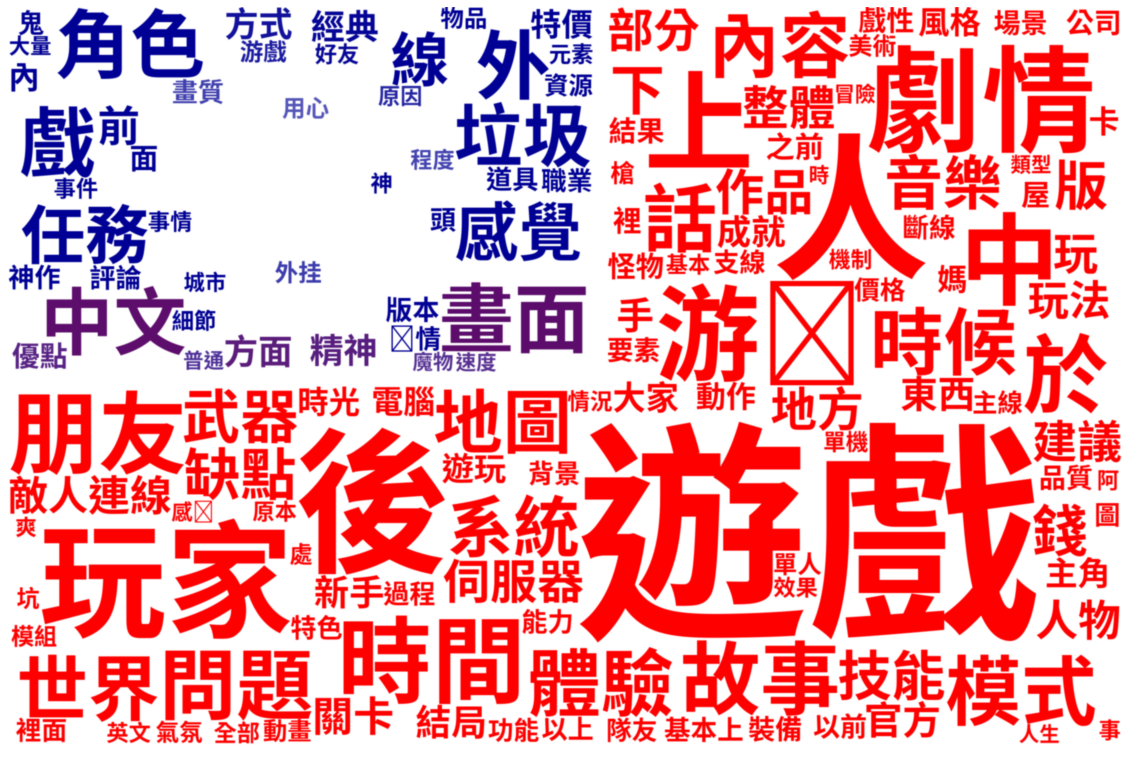

In [13]:
mask = np.array(Image.open(f"./flag/{lang}.png"))

wc = WordCloud(font_path=lang_data.font_path[lang], prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 8, # max_font_size = 100,
               max_words=150, width=2560, height=1707).generate_from_frequencies(full_counter) 

plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.savefig(f"{lang}.png")
plt.show() 

In [27]:
# 단어 빈도수 통계, 다빈도 어휘
# ec is Entire Counter
ec_df = pd.DataFrame([full_counter]).transpose()
ec_df.columns = ["count"]

# 빈도순 정렬
ec_df = ec_df.sort_values(by="count", ascending=False, na_position="last")

display(ec_df.head(10))

,count
游戏,2864278
人,610038
玩家,369192
剧情,333672
上,328878
垃圾,311997
感觉,259443
小时,249875
时候,246766
外挂,246701


[1st Quadrant]
游戏        = 667551
人         = 156841
剧情        = 106376
上         = 81199
玩家        = 75337

[2nd Quadrant]
游戏        = 1464026
人         = 326989
剧情        = 187959
上         = 184737
玩家        = 183855

[3rd Quadrant]
游戏        = 545967
垃圾        = 192859
外挂        = 137024
服务器       = 109493
人         = 91438

[4th Quadrant]
游戏        = 186734
垃圾        = 66969
外挂        = 43628
人         = 34770
玩家        = 26624


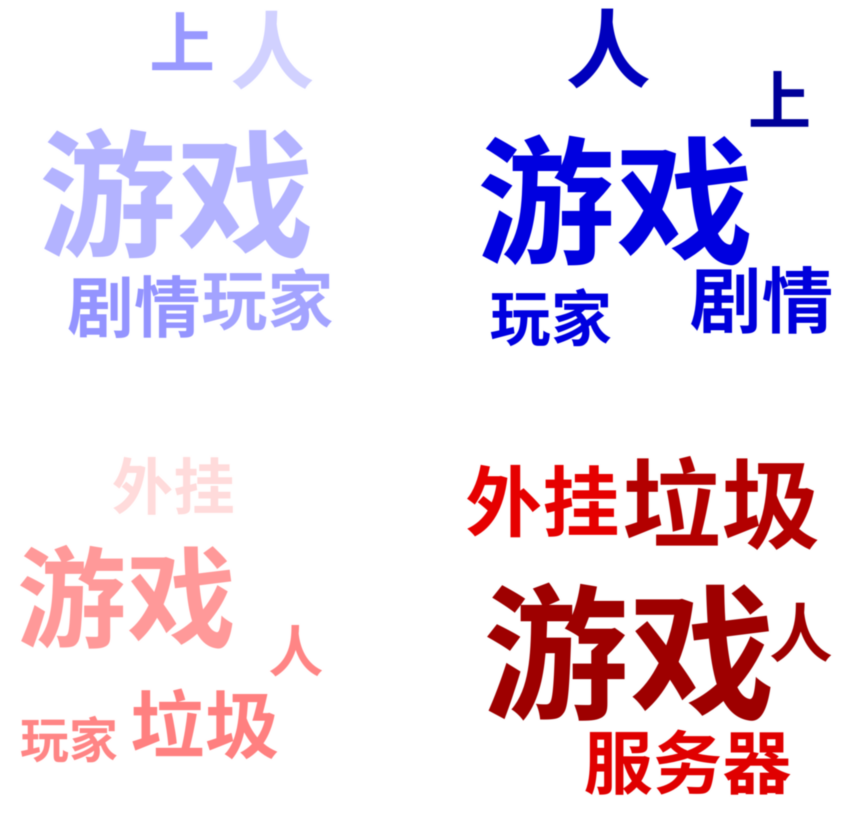

In [29]:
# 영역별 Top 5
# 색상 조정 함수
def q1_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return (f"hsl(240, 100%, {randint(30, 50)}%)")

def q2_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return (f"hsl(240, 100%, {randint(75, 95)}%)") 

def q3_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return (f"hsl(0, 100%, {randint(30, 50)}%)")

def q4_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return (f"hsl(0, 100%, {randint(75, 95)}%)")  


# 사분면 별 워드 클라우드 제작
q1_wc = WordCloud(font_path=lang_data.font_path[lang], prefer_horizontal = 1.0, min_font_size=2, font_step=10,
                  background_color="white", color_func=q1_color_func,
                  max_words=5, width=1000, height=1000).generate_from_frequencies(quad1_counter)

q2_wc = WordCloud(font_path=lang_data.font_path[lang], prefer_horizontal = 1.0, min_font_size=2, font_step=10,
                  background_color="white", color_func=q2_color_func,
                  max_words=5, width=1000, height=1000).generate_from_frequencies(quad2_counter)

q3_wc = WordCloud(font_path=lang_data.font_path[lang], prefer_horizontal = 1.0, min_font_size=2, font_step=10,
                  background_color="white", color_func=q3_color_func,
                  max_words=5, width=1000, height=1000).generate_from_frequencies(quad3_counter)

q4_wc = WordCloud(font_path=lang_data.font_path[lang], prefer_horizontal = 1.0, min_font_size=2, font_step=10,
                  background_color="white", color_func=q4_color_func,
                  max_words=5, width=1000, height=1000).generate_from_frequencies(quad4_counter)


# 정보
print("[1st Quadrant]")
for value in quad1_counter.most_common(5):
    word, count = value
    print(f"{word.ljust(10)}= {count}")

print("\n[2nd Quadrant]")
for value in quad2_counter.most_common(5):
    word, count = value
    print(f"{word.ljust(10)}= {count}")
    
print("\n[3rd Quadrant]")
for value in quad3_counter.most_common(5):
    word, count = value
    print(f"{word.ljust(10)}= {count}")
    
print("\n[4th Quadrant]")
for value in quad4_counter.most_common(5):
    word, count = value
    print(f"{word.ljust(10)}= {count}")
    
    
# 워드 클라우드
figure, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0,0].imshow(q2_wc, cmap=plt.cm.gray, interpolation="bicubic")
axes[0,0].axis("off")

axes[0,1].imshow(q1_wc, cmap=plt.cm.gray, interpolation="bicubic")
axes[0,1].axis("off")

axes[1,0].imshow(q4_wc, cmap=plt.cm.gray, interpolation="bicubic")
axes[1,0].axis("off")

axes[1,1].imshow(q3_wc, cmap=plt.cm.gray, interpolation="bicubic")
axes[1,1].axis("off")

plt.show() 